In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement

In [9]:
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
#For self - testing out inspector
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
#For self - testing out inspector
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
first_row_m = session.query(Measurement).first()
first_row_m.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2677a58c4a8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [15]:
first_row_s = session.query(Station).first()
first_row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2677a596128>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Getting most recent date from db using session.query
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [17]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Year Ago Date: ", year_ago)

Year Ago Date:  2016-08-23


In [18]:
# Perform a query to retrieve the data and precipitation scores

sel = [Measurement.date, func.avg(Measurement.prcp)]
year_range=session.query(*sel).\
    filter(Measurement.date.between("2016-08-23", "2017-08-23")).\
    group_by(Measurement.date).all()
year_range

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

In [19]:
#######Ask Gretel/TA####
# sel = [Measurement.station, Measurement.date, Measurement.prcp]
# session.query(*sel).\
#     filter(Measurement.date >= "2016-08-23").\
#     group_by(Measurement.station).\
#     order_by(Measurement.station).all()

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(year_range, columns=['date', 'avg_prcp'])
df.set_index('date', inplace=True)
final_df = df.round(2)
final_df

,avg_prcp
date,
2016-08-23,0.45
2016-08-24,1.55
2016-08-25,0.08
2016-08-26,0.02
2016-08-27,0.06
...,...
2017-08-19,0.03
2017-08-20,0.00
2017-08-21,0.19


In [21]:
# Sort the dataframe by date - is this needed, since the df is already in ascending order?
sorted_df = final_df.sort_values(by='date')
sorted_df

,avg_prcp
date,
2016-08-23,0.45
2016-08-24,1.55
2016-08-25,0.08
2016-08-26,0.02
2016-08-27,0.06
...,...
2017-08-19,0.03
2017-08-20,0.00
2017-08-21,0.19


In [22]:
# pd.Series(["avg_prcp"]).plot(kind="bar")

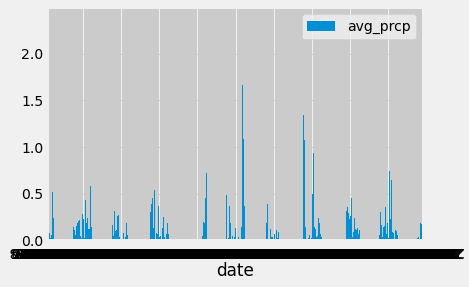

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data - TO REVISIT
sorted_df.plot.bar(rot=180)
plt.show()

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.describe()

,avg_prcp
count,366.000000
mean,0.170929
std,0.295845
min,0.000000
25%,0.010000
50%,0.070000
75%,0.190000
max,2.380000


In [25]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).distinct().count()

9

In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station, func.count(Measurement.date)]
active_stations=session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
#Based on the above query result, station USC00519281 has the greatest number of observations.

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station? (EXTRA QUESTION)


In [29]:
# Choose the station with the highest number of temperature observations.
#Gets the last date for this station.
session.query(Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).first()

('2017-08-18')

In [30]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date, Measurement.tobs]
temp_range=session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date.between("2016-08-18", "2017-08-18")).\
    group_by(Measurement.date).\
    order_by(Measurement.tobs.desc()).all()
temp_range

[('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-07-29', 82.0),
 ('2017-07-23', 82.0),
 ('2017-07-30', 81.0),
 ('2017-07-28', 81.0),
 ('2017-07-02', 81.0),
 ('2017-03-11', 81.0),
 ('2016-08-20', 81.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-06-01', 80.0),
 ('2017-05-28', 80.0),
 ('2016-09-27', 80.0),
 ('2016-09-11', 80.0),
 ('2016-09-08', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-01', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-25', 80.0),
 ('2016-08-18', 80.0),
 ('2017-08-18', 79.0),
 ('2017-07-01', 79.0),
 ('2017-06-17', 79.0),
 ('2017-05-06', 79.0),
 ('2017-02-14', 79.0),
 ('2016-10-16', 79.0),
 ('2016-10-14', 79.0),
 ('2016-10-12', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-02', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-24', 79.0),
 ('2016-09-17', 79.0),
 ('2016-09-15', 79.0),
 ('2016-09-13', 79.0),
 ('2016-09-09', 79.0),
 ('2016-08-21', 79.0),
 ('2016-08-19', 79.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-

In [54]:
# date_str = "2017"
sel = [Measurement.date, Measurement.tobs]
temp_range=session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    filter(func.strftime("%Y", Measurement.date) == "2017").\
    order_by(Measurement.tobs.desc()).all()
temp_range

[('2017-08-06', 83.0),
 ('2017-07-23', 82.0),
 ('2017-07-29', 82.0),
 ('2017-08-05', 82.0),
 ('2017-03-11', 81.0),
 ('2017-07-02', 81.0),
 ('2017-07-28', 81.0),
 ('2017-07-30', 81.0),
 ('2017-05-28', 80.0),
 ('2017-06-01', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-16', 80.0),
 ('2017-02-14', 79.0),
 ('2017-05-06', 79.0),
 ('2017-06-17', 79.0),
 ('2017-07-01', 79.0),
 ('2017-08-18', 79.0),
 ('2017-04-09', 78.0),
 ('2017-04-15', 78.0),
 ('2017-07-04', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-09', 78.0),
 ('2017-01-14', 77.0),
 ('2017-03-04', 77.0),
 ('2017-03-26', 77.0),
 ('2017-04-08', 77.0),
 ('2017-05-14', 77.0),
 ('2017-06-04', 77.0),
 ('2017-06-24', 77.0),
 ('2017-06-28', 77.0),
 ('2017-07-05', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-22', 77.0),
 ('2017-07-25', 77.0),
 ('2017-08-04', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-15', 77.0),
 ('2017-03-25', 76.0),
 ('2017-03-27', 76.0),
 ('2017-04-20', 76.0),
 ('2017-04-23', 76.0),
 ('2017-05-

In [32]:
df_temp = pd.DataFrame(temp_range, columns=['date', 'tobs'])
df_temp

,date,tobs


In [33]:
#Another way to get min & max
print(df_temp["tobs"].max())
print(df_temp["tobs"].min())

nan
nan


In [34]:
## Bins for histogram - TO REVISIT
bins = [59, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 83]
group_labels = ["<=59", "60 to 62", "62 to 64", "64 to 66", "66 to 68", "68 to 70", "70 to 72", "72 to 74", "74 to 76", "76 to 78",">78"]

In [35]:
pd.cut(df_temp["tobs"], bins, labels=group_labels).head()

Series([], Name: tobs, dtype: category
Categories (11, object): ['<=59' < '60 to 62' < '62 to 64' < '64 to 66' ... '72 to 74' < '74 to 76' < '76 to 78' < '>78'])

In [36]:
df_temp["temp range"]=pd.cut(df_temp["tobs"], bins, labels=group_labels).head()
df_temp

,date,tobs,temp range


In [37]:
df_temp.to_excel(r'C:\Shamika\Rutgers\shamikasule\sqlalchemy-challenge\bins_test.xlsx', index = False)

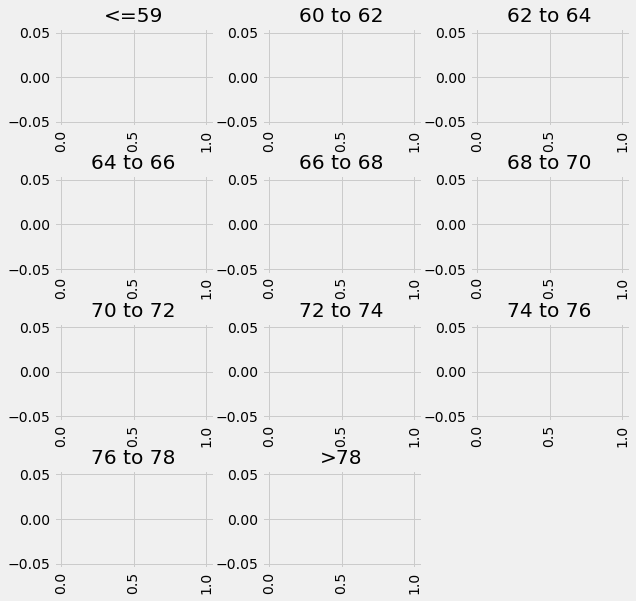

In [38]:
fig=df_temp.hist(by='temp range', column='tobs', figsize=[10, 10])

## Bonus Challenge Assignment

In [39]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [40]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [41]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [42]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [43]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [44]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [45]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [46]:
# Plot the daily normals as an area plot with `stacked=False`
